In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [289]:

cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
        'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
        'hours-per-week', 'native-country', 'target']

df = pd.read_csv("data/adultcensus_data/adult.data", sep=",", header=None, 
                na_values=['?'],
                names=cols,
                skipinitialspace=True)


df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [290]:
# Remove dupplication
s = df.duplicated()
print("Number of dupplicaion: ", len(s[s==True]))

df.drop_duplicates(inplace=True)

Number of dupplicaion:  24


In [291]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [292]:
# df.info()
df[df['age'] == 67].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
346,67,NaN,36135,11th,7,Married-civ-spouse,NaN,Husband,White,Male,0,0,8,United-States,<=50K
474,67,Private,49401,Assoc-voc,11,Divorced,Other-service,Not-in-family,White,Female,0,0,24,United-States,<=50K
534,67,Private,231559,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,48,United-States,>50K
917,67,Self-emp-inc,76860,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>50K


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  31955 non-null  object
 14  target          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Now, the summary shows that the variables - workclass, occupation and native.country contain missing values. All of these variables are categorical data type. So, I will impute the missing values with the most frequent value- the mode.

In [294]:
# Impute missing values with mode

for col in ["workclass", "occupation", "native-country"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [295]:
# Setting feature vector and target vector

X = df.drop(['target'], axis=1)
y = df['target']

X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [296]:
# Splitting data 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Feature engineering

In [297]:
# Encoded categorical variabels

categorical =  ['workclass', 'education', 'marital-status', 'occupation', 
                'relationship', 'race', 'sex', 'native-country']
for feat in categorical:
    le = LabelEncoder()
    X_train[feat] = le.fit_transform(X_train[feat])
    X_test[feat] = le.transform(X_test[feat])

# Feature Scalling

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X.columns)


In [298]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.187734,-0.078037,1.196504,-0.339808,1.132764,0.918219,1.475563,0.970664,0.395503,0.700852,-0.143188,-0.215168,-0.038289,0.261196
1,-0.626336,-0.078037,-0.833530,1.215068,-0.032384,0.918219,0.216130,-0.277043,0.395503,-1.426835,-0.143188,-0.215168,-0.038289,0.261196
2,0.177768,-0.078037,-0.439637,-0.598954,0.355999,-0.408081,0.216130,-0.900896,-3.111665,0.700852,0.844554,-0.215168,1.590480,-3.051851
3,0.543270,0.826442,0.253463,0.437630,1.521147,-0.408081,1.223676,-0.900896,0.395503,0.700852,-0.143188,4.764691,1.590480,0.261196
4,-0.114634,-1.886997,0.564820,-0.598954,0.355999,-0.408081,0.971790,-0.900896,0.395503,0.700852,-0.143188,-0.215168,-0.038289,0.261196


### Logistics Regression model with and without PCA

In [299]:
##  Logistic Regression model with all features

from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score

lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

print(f"Logistic Regression acc score with all the features {accuracy_score(y_test, y_pred)}")

Logistic Regression acc score with all the features 0.8239090350338045


In [300]:
## Logistic Regression with PCA

from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

pca.explained_variance_ratio_


The number of dimensions required to preserve 90% of variance is 12


array([0.14714627, 0.1012281 , 0.08081389, 0.07861446, 0.07415962,
       0.07336682, 0.07064408, 0.06776664, 0.06468417, 0.06134237,
       0.0608966 , 0.04889032, 0.04283901, 0.02760765])

In [301]:
# drop last 2 features as it carries little information

X = df.drop(['target', 'native-country', 'hours-per-week'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

for feature in categorical:
        le = LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

print(f"Logistic Regression acc score with all the features {accuracy_score(y_test, y_pred)}")


Logistic Regression acc score with all the features 0.8254456054087277


In [302]:
# Save npy file for X, y
categorical =  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
for feat in categorical:
    le = LabelEncoder()
    X[feat] = le.fit_transform(X[feat])

le = LabelEncoder()
y = le.fit_transform(y)

# Feature Scalling

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

X_save = X.to_numpy()
y[y == 0] = -1
y_save = y
sensitive_feat = df.sex.to_numpy() # Choose gender as sensitive feature
sensitive_feat[sensitive_feat == " Male"] = 1
sensitive_feat[sensitive_feat == " Female"] = -1
s1 = sensitive_feat


np.save("data/adultcensus_data/XS_adult.npy", X_save)
np.save("data/adultcensus_data/y_adult.npy", y_save)
np.save("data/adultcensus_data/s_adult.npy", s1)

### Match with crowdsourcing data

In [303]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

In [304]:
# Reading crowdsourcing data
df_crowd = pd.read_csv('data/crowdsourcing-data/AdultCensus_crowdsourcing_data.csv', skipinitialspace=True)
df_crowd.rename(columns={'role_in_family': 'relationship', 
                        'work_hours_per_week' : 'hours-per-week',
                        'gender' : 'sex', 
                        'true_label' : 'target',
                        'work_class': 'workclass',
                        'education_num': 'education-num',
                        'marital_status' : 'marital-status',
                        'capital_gain' : 'capital-gain'}, inplace=True)

print(len(df_crowd))
print(df_crowd.columns)                  

3046
Index(['example_idx', 'age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'capital-gain',
       'hours-per-week', 'sex', 'race', 'target', 'ans_1', 'ans_2', 'ans_3',
       'ans_4', 'ans_5', 'ans_6', 'ans_7', 'ans_8', 'ans_9', 'ans_10',
       'ans_11', 'worker_id_1', 'worker_id_2', 'worker_id_3', 'worker_id_4',
       'worker_id_5', 'worker_id_6', 'worker_id_7', 'worker_id_8',
       'worker_id_9', 'worker_id_10', 'worker_id_11'],
      dtype='object')


In [305]:
# Find rows in original df that are same in df_crowd

common_cols = ['age', 'workclass', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship',
                'capital-gain', 'hours-per-week', 'race']

df_drop = pd.merge(df_crowd, df, on=common_cols, how='inner') 
df_intersect = pd.merge(df, df_crowd, on=common_cols, how='right') # 3222 


cond = df_intersect[common_cols].isin(df[common_cols])
df_train = df.drop(df_intersect[cond].index)

len(df_intersect), len(df_drop), len(df_train), len(df)



(3222, 528, 29315, 32537)

In [306]:
df_crowd.columns

Index(['example_idx', 'age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'capital-gain',
       'hours-per-week', 'sex', 'race', 'target', 'ans_1', 'ans_2', 'ans_3',
       'ans_4', 'ans_5', 'ans_6', 'ans_7', 'ans_8', 'ans_9', 'ans_10',
       'ans_11', 'worker_id_1', 'worker_id_2', 'worker_id_3', 'worker_id_4',
       'worker_id_5', 'worker_id_6', 'worker_id_7', 'worker_id_8',
       'worker_id_9', 'worker_id_10', 'worker_id_11'],
      dtype='object')

In [307]:
df_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

In [308]:
# Drop features that not in crowdsourcing data

X = df_train.drop(['target', 'native-country', 'fnlwgt', 'capital-loss'], axis=1)
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

for feature in categorical:
        le = LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

print(f"Logistic Regression acc score with 11 features {accuracy_score(y_test, y_pred)}")


Logistic Regression acc score with 11 features 0.8234223990903923


### Preprocessing crowdsourcing data

In [309]:
df_crowd.drop('example_idx', inplace=True, axis=1)

In [310]:
df_crowd.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'capital-gain', 'hours-per-week', 'sex',
       'race', 'target', 'ans_1', 'ans_2', 'ans_3', 'ans_4', 'ans_5', 'ans_6',
       'ans_7', 'ans_8', 'ans_9', 'ans_10', 'ans_11', 'worker_id_1',
       'worker_id_2', 'worker_id_3', 'worker_id_4', 'worker_id_5',
       'worker_id_6', 'worker_id_7', 'worker_id_8', 'worker_id_9',
       'worker_id_10', 'worker_id_11'],
      dtype='object')

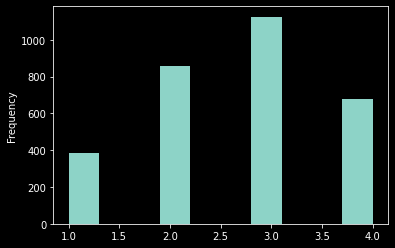

In [311]:
df_crowd['ans_10'].plot(kind='hist')
plt.show()

Get mean value of 11 answers each sample 
and compare with the thresholds 2.5 to come up with final guess label

In [312]:
ans = ["ans_"+str(i) for i in range(1,12)]
df_crowd['guess'] = df_crowd[ans].mean(axis=1)
df_crowd.loc[df_crowd['guess'] <= 2.5, 'guess'] = -1
df_crowd.loc[df_crowd['guess'] > 2.5, 'guess'] = 1
df_crowd['guess'].astype('int64')

0      -1
1       1
2       1
3      -1
4      -1
       ..
3041   -1
3042   -1
3043   -1
3044   -1
3045   -1
Name: guess, Length: 3046, dtype: int64

Check the accuracy of the crowdsourcing 'guess' label with true label

In [313]:
print(accuracy_score(df_crowd['target'], df_crowd['guess']))

0.7255416940249507


In [314]:
drop_worker = ['worker_id_1',
       'worker_id_2', 'worker_id_3', 'worker_id_4', 'worker_id_5',
       'worker_id_6', 'worker_id_7', 'worker_id_8', 'worker_id_9',
       'worker_id_10', 'worker_id_11']

### Save npy file of validation set X_val, y_val constructing from crowdsourcing data df_crowd

In [315]:
X_val = df_crowd.drop(ans + drop_worker + ['target', 'guess', ], axis=1)
y_val = df_crowd['guess']


X_val.shape, y_val.shape

((3046, 11), (3046,))

In [316]:
categorical =  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
for feat in categorical:
    le = LabelEncoder()
    X_val[feat] = le.fit_transform(X_val[feat])

le = LabelEncoder()
y_val = le.fit_transform(y_val)

# Feature Scalling

scaler = StandardScaler()
X_val = pd.DataFrame(scaler.fit_transform(X_val), columns = X_val.columns)


X_val_save = X_val.to_numpy()
y_val[y_val == 0] = -1
y_val_save = y_val
sensitive_feat = df_crowd.sex.to_numpy() # Choose gender as sensitive feature
sensitive_feat[sensitive_feat == "Male"] = 1
sensitive_feat[sensitive_feat == "Female"] = -1
s1_val = sensitive_feat


np.save("data/adultcensus_data/XS_val_adult.npy", X_val_save)
np.save("data/adultcensus_data/y_val_adult.npy", y_val_save)
np.save("data/adultcensus_data/s_val_adult.npy", s1_val)

### Save npy file for X_train, y_train from df_train

In [317]:
categorical =  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
for feat in categorical:
    le = LabelEncoder()
    X[feat] = le.fit_transform(X[feat])

le = LabelEncoder()
y = le.fit_transform(y)

# Feature Scalling

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

X_train_save = X_train.to_numpy()
y[y == 0] = -1
y_train_save = y
sensitive_feat = df_train.sex.to_numpy() # Choose gender as sensitive feature
sensitive_feat[sensitive_feat == "Male"] = 1
sensitive_feat[sensitive_feat == "Female"] = -1
s1_train = sensitive_feat


np.save("data/adultcensus_data/XS_train_adult.npy", X_train_save)
np.save("data/adultcensus_data/y_train_adult.npy", y_train_save)
np.save("data/adultcensus_data/s_train_adult.npy", s1_train)

In [318]:
X_save.shape, y_save.shape, s1.shape

((32537, 12), (32537,), (32537,))

In [319]:
X_val_save.shape, y_val_save.shape, s1_val.shape

((3046, 11), (3046,), (3046,))

In [320]:
X_train_save.shape, y_train_save.shape, s1_train.shape


((29315, 11), (29315,), (29315,))